In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Exploratory Data Analysis

### Data Loading

In [3]:
# Load Data
video_df = pd.read_csv("videos-stats.csv")
comm_df = pd.read_csv("comments.csv")

# Drop Unnamed: 0 column
video_df = video_df.drop(columns=["Unnamed: 0"])
comm_df = comm_df.drop(columns=["Unnamed: 0"])

### Information of Comment Data

In [4]:
# Display video data
display(video_df.info())
display(video_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


None

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


### Information of Comment Data

In [5]:
# Display comment data
display(comm_df.info())
display(comm_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Video ID   18409 non-null  object 
 1   Comment    18408 non-null  object 
 2   Likes      18409 non-null  float64
 3   Sentiment  18409 non-null  float64
dtypes: float64(2), object(2)
memory usage: 575.4+ KB


None

,Video ID,Comment,Likes,Sentiment
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


### Analyzing Missing Values

In [6]:
# Display nan values
print("Video data nan values:")
display(video_df[video_df.isna().any(axis=1)])

print("Comment data nan values:")
display(comm_df[comm_df.isna().any(axis=1)])

# Drop nan values
video_df = video_df.dropna()
comm_df = comm_df.dropna()

Video data nan values:


,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1879,What is Machine Learning?,f_uwKZIAeM0,2017-01-11,machine learning,NaN,NaN,NaN
1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN


Comment data nan values:


,Video ID,Comment,Likes,Sentiment
9745,bvkk3UdlfA4,NaN,1.0,1.0


### Investigating Column Data Types

In [7]:
# Check columns if can be casted safely to int
def check_int(df, col):
    if df[col].dtype == "object":
        print(col + ": string")
        return
    
    all_integers = all(int(x) == x for x in df[col])

    if all_integers:
        print(col + ": integer")
    else:
        print(col + ": float")

# Check data types for video data
print("Video data types:")
for col in video_df.columns:
    check_int(video_df, col)

# Check data types for comment data
print()
print("Comment data types:")
for col in comm_df.columns:
    check_int(comm_df, col)

Video data types:
Title: string
Video ID: string
Published At: string
Keyword: string
Likes: integer
Comments: integer
Views: integer

Comment data types:
Video ID: string
Comment: string
Likes: integer
Sentiment: integer


In [8]:
# Cast columns to int in video_df
video_df["Likes"] = video_df["Likes"].astype(int)
video_df["Comments"] = video_df["Comments"].astype(int)
video_df["Views"] = video_df["Views"].astype(int)

# Cast columns to int in comm_df
comm_df["Likes"] = comm_df["Likes"].astype(int)
comm_df["Sentiment"] = comm_df["Sentiment"].astype(int)

### Distribtion of Sentiments

In [86]:
def calculate_percentages(counts, total):
  return [round((count / total) * 100, 1) for count in counts]

def plot_dist_col(data, col, figsize, labels=None, show_percentage=False, palette=None, rotate=False):
  fig, ax = plt.subplots(figsize=figsize)
  sns.countplot(x=col, data=data, hue=col, palette=palette, ax=ax, legend=False)

  # Show percentages
  if show_percentage:
    ax = plt.gca()
    bars = ax.patches
    total_count = len(comm_df)
    percentages = calculate_percentages([bar.get_height() for bar in bars], total_count)

    # Add percentages to the plot
    for bar, percentage in zip(bars, percentages):
      x, y, width, height = bar.get_bbox().bounds
      plt.text(x + width/2, y + height + 0.1, f"{percentage}%", ha='center', va='bottom', fontsize=10)
  
  # Set x labels
  if labels is not None:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels)

  # Rotate x labels
  if rotate:
    plt.xticks(rotation=90)

  # Set title and labels
  ax.set_title(col + " Distribution")
  ax.set_xlabel(col)
  ax.set_ylabel("Count")
  plt.show()

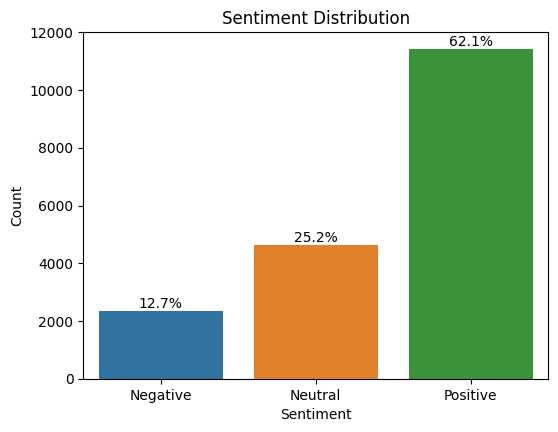

In [87]:
plot_dist_col(comm_df, 'Sentiment', figsize=(6, 4.5), labels=['Negative', 'Neutral', 'Positive'], show_percentage=True, palette='tab10')

### Distribution of Keywords

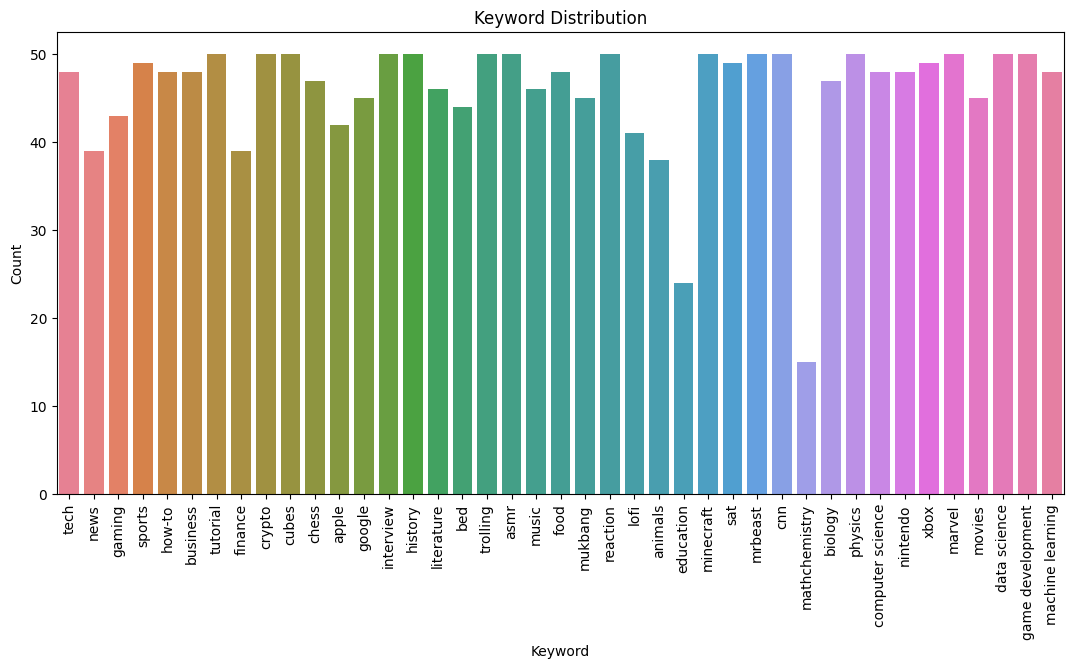

In [88]:
plot_dist_col(video_df, 'Keyword', figsize=(13, 6), rotate=True)

### Word Cloud for Comments

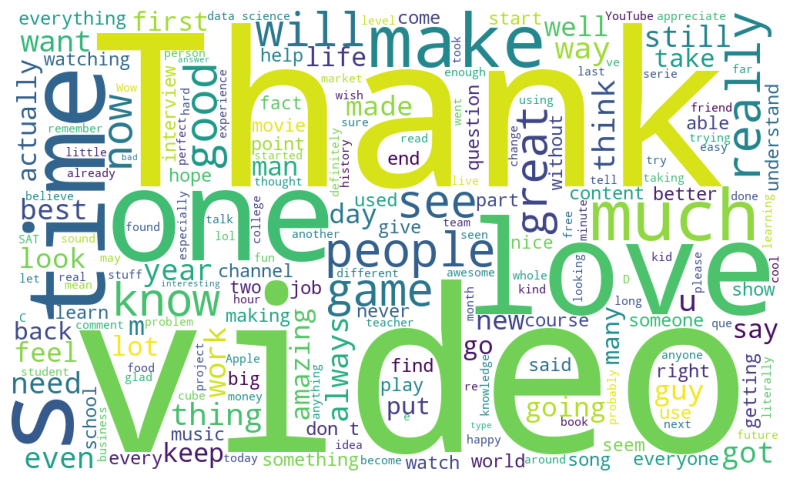

In [13]:
from wordcloud import WordCloud

all_words = ' '.join(word for word in comm_df['Comment'])
wordcloud = WordCloud(
    width = 1000,
    height = 600,
    background_color = 'white').generate(all_words)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Distribution of Comment Lengths

#### Shortest and Longest Comments

In [ ]:
# Show the shortest comment
shortest_comment = min(comm_df['Comment'], key=len)
print("Shortest comment:", shortest_comment)

In [31]:
comm_df['Comment Length'] = comm_df['Comment'].apply(lambda x: len(str(x).split()))

# Show the shortest comment
print("Shortest size:", comm_df['Comment Length'].min())
shortest_comment = min(comm_df['Comment'], key=len)
print("Shortest comment:", shortest_comment)
print()

# Show the longest comment
print("Longest size:", comm_df['Comment Length'].max())
longest_comment = max(comm_df['Comment'], key=len)
print("Longest comment:", longest_comment)

Shortest size: 1
Shortest comment: 🙄

Longest size: 1684
Longest comment: TIMESTAMPS THIS TOOK FOREVER (v2):
0:01 - Intro
———————————
0:35 - Original NxN
0:40 - 1x1
0:54 - LanLan 2x2
1:10 - Rubik’s 3x3
1:25 - Rubik’s 4x4
1:38 - Rubik’s 5x5
1:54 - V-Cube 6
2:08 - V-Cube 7
2:26 - V-Cube 8
2:51 - MFJS MF8 8x8
3:02 - MFJS MF9 9x9
3:12 - YuXin HuangLong 13x13
——————————————————
3:24 - Main Speedcubes
3:32 - GAN 251 M Pro
3:40 - GAN 12 MagLev
3:53 - Valk 4 M (Strong)
4:01 - Valk 5 M
4:06 - YJ MGC 6x6
4:18 - YuXin Hays 7 M
4:31 - X-Man Volt Square-1 V2 M UD
4:46 - GAN Skewb M Enhanced
4:57 - MoYu WeiLong Pyraminx (MagLev)
5:08 - YJ YuHu Megaminx V2 M
5:18 - QiYi Magnetic Clock
5:31 - Rubik’s Clock
5:41 - Rubik’s Clock #2
5:54 - Intermission
6:10 - Giant 30cm 3x3
6:25 - HeShu Super Big 3x3
—————————————————
6:43 - Shape Mods & Cuboids
6:52 - “Brick” Bandaged Cube
7:07 - “Meffert’s” Bandaged Cube
7:19 - Cutter Cube (Old)
7:32 - Cutter Cube
7:46 - Fisher Cutter Cube
8:04 - Octagonal Barrel
8:13 

#### Statistics of Comment Lenghts

In [28]:
comm_df['Comment Length'].describe()

count    18408.000000
mean        33.375815
std         46.499846
min          1.000000
25%         13.000000
50%         21.000000
75%         38.000000
max       1684.000000
Name: Comment Length, dtype: float64

### Distribution of Comment Lengths

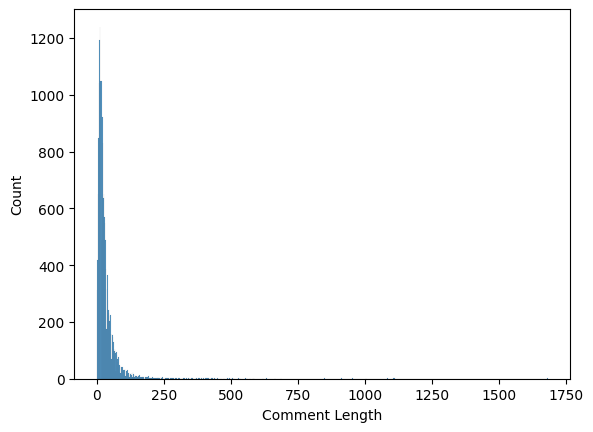

In [18]:
sns.histplot(data=comm_df, x="Comment Length")
plt.show()

#### Checking for Outliers

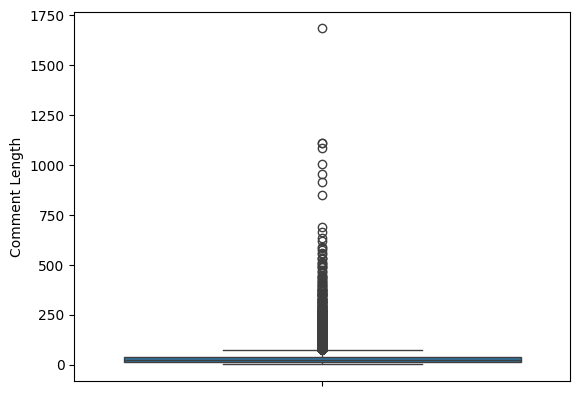

In [19]:
sns.boxplot(data=comm_df['Comment Length'])
plt.show()

In [23]:
def print_quartiles_and_limits(data):
  
  # Calculate quartiles
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)
  iqr = q3 - q1  # Interquartile Range

  # Find minimum and maximum within limits
  lower_limit = q1 - 1.5 * iqr
  upper_limit = q3 + 1.5 * iqr
  filtered_data = data[(data >= lower_limit) & (data <= upper_limit)]
  min_val = np.min(filtered_data)
  max_val = np.max(filtered_data)

  # Print results
  print("Quartiles:")
  print(f"  Q1 (1st quartile): {q1}")
  print(f"  Q3 (3rd quartile): {q3}")
  print()
  print("Non-outlier range:")
  print(f"  Minimum: {min_val}")
  print(f"  Maximum: {max_val}")

In [24]:
print_quartiles_and_limits(comm_df['Comment Length'])

Quartiles:
  Q1 (1st quartile): 13.0
  Q3 (3rd quartile): 38.0

Non-outlier range:
  Minimum: 1
  Maximum: 75


#### Distribution of Comments Lenghts After Removing the Outliers

In [25]:
new_comments = comm_df[comm_df['Comment Length'] < 75]

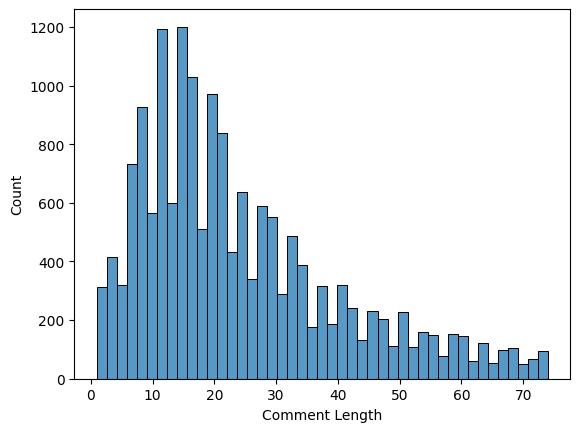

In [26]:
sns.histplot(data=new_comments, x="Comment Length")
plt.show()